In [1]:
#Make sure to append the iArat folder to the system path
import sys
sys.path.append('directory/containing/theiAratdir')  

import iArat

# iArat senserless motion tracking data analysis

This notebook helps you through the code of the data analysis.
It assumes that at least two videos from different angles are already trained using Deeplabcut.

Make sure that opencv is correctly installed in your environment.

For the data analysis the following is needed:

- Calibration images to get the intrinsic camera parameters and distortion matrix
- CSV data of both cameras
- a calibration image of both camera angle containing a chessboard

# Camera calibration
First the camera needs to be calibrated. For this at least 10 images of the chessboard (pattern.png comes with opencv distribution) from different angles are needed.

The code will run through all the images that are in the working folder and find the chessboard corners.
Every image from which the corners are found are saved and will be used for finding the camera matrix and distortion matrix.
The distortion and camera matric will be saved in the working folder as a txt file

(This can take pretty long and should be done for both cameras)

Needed inputs are:
- number of rows and columns of the chess board
- the dimension of the chess board squares
- the directory in which the calibration images are stored
- the calibration image type


In [2]:
nRows = 9
nCols = 6
dimension = 25  #in mm (must be an integer)

Cal_dir = "Directory/in/which/the/calibration/images/are"
imagetype = "jpg"

In [ ]:
iArat.calibrate(nRows,nCols,dimension,Cal_dir,imagetype)

# Plot 3D data
This script will find the corners of the chessboard that is in the image of the video.
It optimizes the 3D reconstruction of the chessboard and finds the rotation matrix such that the chess board is rotated that the longer side is alligned with the y axis.

Next the data points of the CSV file will be loaded and rotated and translated in our new axis. The data will be plotted in a 3D plot.

Last the position, velocity and acceleration are plotted. These however need filtering still

For the function the following is needed:
- Location of both CSV files
- Location of both calibration images
- Chessboard rows and colums

In [4]:
CSV_data_camera1 = "CSV/file/1.CSV"
CSV_data_camera2 = 'CSV/file/2.CSV'
Cal_img1 = "Image/containing/chessboard/camera 1.jpg"
Cal_img2 = "Image/containing/chessboard/camera 2.jpg"


#############################

C:\Users\Beheerder\Documents\_UT\Internship\iArat\utils\optimize.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (a, b, c), resid, rank, s = np.linalg.lstsq(G, Z)


########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

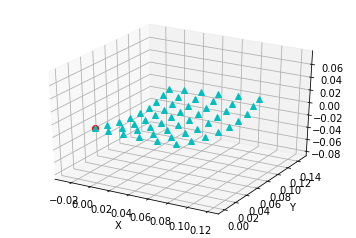

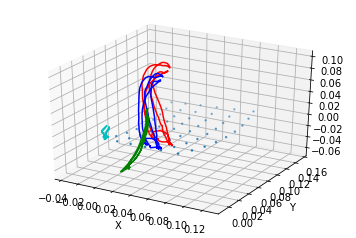

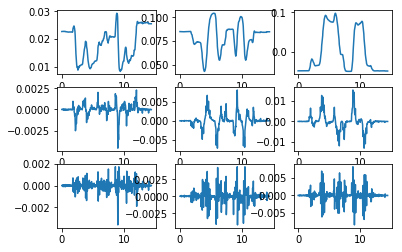

In [5]:
iArat.data_3D(CSV_data_camera1,CSV_data_camera2, Cal_img1, Cal_img2, nRows, nCols)

# Getting frames from video
Because of the fact that almost the same image can give a bad result, a code was written to find a frame from a video, test it and select it if it is a good frame. The frame is saved in the location of the video as "Cal_X.jpg"

For this code the following is needed:
- The location of calibration image from camera 1
- the location of a short video of camera 2 and its name
- chess board rows and colums
- the number of frames you want to try before cancelling the operation

In [ ]:
Cal_img1 = "Image/containing/chessboard/camera1.jpg"
Cal_vid_loc = "Directory/inwhich/thevideo/islocated"
Cal_vid= "videoname.mp4"

Nr_of_frames = 5

In [ ]:
iArat.findframes(Cal_img1,Cal_vid_loc,Cal_vid, nRows,nCols, Nr_of_frames)

# Creating image with tracking lines from single camera

This quick script was written to create an image with tracking lines. The frame can be choosen aswell as the length (number of frames) of the tracking line.

Needed for the script are:
- CSV data
- Corresponding video
- the working directory in which the frame is saved
- And choose the tracking length and which frame

In [ ]:
CSV_data = "CSV/file.CSV"
vid = "location/of/video.mp4"
working_dir = "your/working/directory"
track_length = 60
tracked_frame= 120

In [ ]:
iArat.line_tracked_image(CSV_data,vid,working_dir,track_length,tracked_frame)